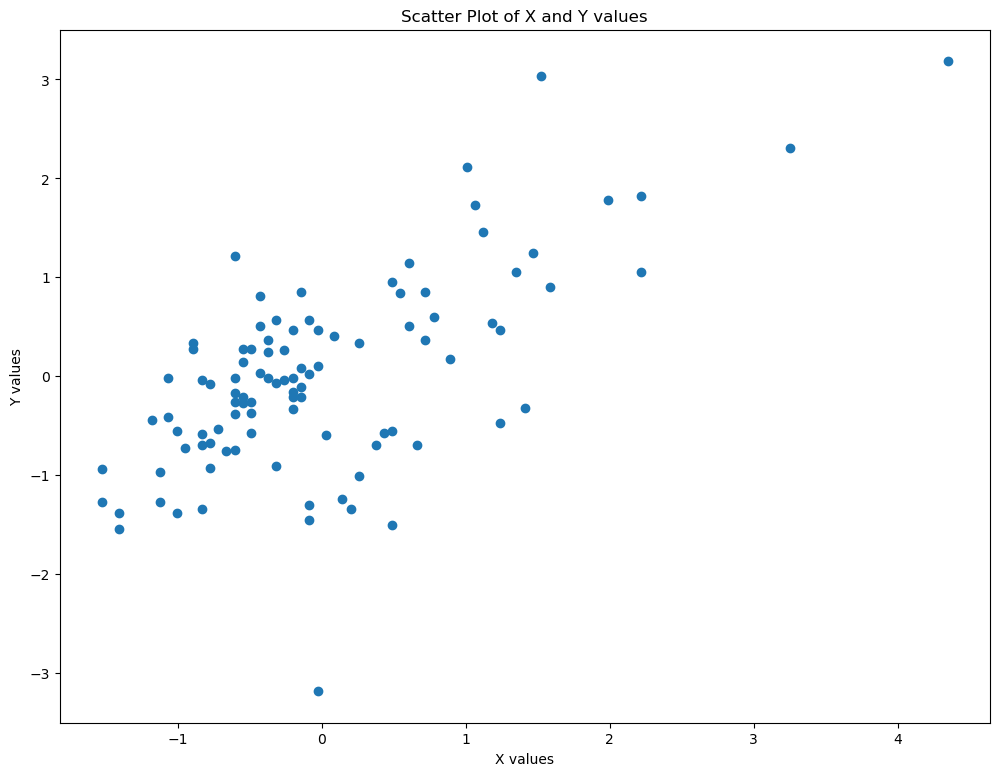

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0,9.0)

#preprocessing
x_data = pd.read_csv('linearX.csv')
y_data = pd.read_csv('linearY.csv')
X = x_data.iloc[:, 0]
Y = y_data.iloc[:, 0]
X = (X - X.mean())/(X.std())
Y = (Y - Y.mean())/(Y.std())
plt.scatter(X,Y)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot of X and Y values')
plt.show()

In [16]:
#Model Build
m = 0
c = 0
L = 0.5
epochs = 1000
n = float(len(X))

for i in range(epochs):
    Y_pred = m * X + c
    cost = (1/n) * sum((Y - Y_pred)**2)
    print(f'Epoch {i+1}, Cost: {cost}')

    D_m = (-2/n) * sum(X * (Y - Y_pred))
    D_c = (-2/n) * sum(Y - Y_pred)

    m = m - L * D_m
    c = c - L * D_c

print("Slope (m):", m)
print("Intercept (c):", c)


Epoch 1, Cost: 0.9898989898989893
Epoch 2, Cost: 0.5561843124910422
Epoch 3, Cost: 0.5561400604068251
Epoch 4, Cost: 0.5561400558917672
Epoch 5, Cost: 0.556140055891306
Epoch 6, Cost: 0.5561400558913063
Epoch 7, Cost: 0.5561400558913059
Epoch 8, Cost: 0.5561400558913064
Epoch 9, Cost: 0.5561400558913063
Epoch 10, Cost: 0.5561400558913063
Epoch 11, Cost: 0.5561400558913063
Epoch 12, Cost: 0.5561400558913063
Epoch 13, Cost: 0.5561400558913063
Epoch 14, Cost: 0.5561400558913063
Epoch 15, Cost: 0.5561400558913063
Epoch 16, Cost: 0.5561400558913063
Epoch 17, Cost: 0.5561400558913063
Epoch 18, Cost: 0.5561400558913063
Epoch 19, Cost: 0.5561400558913063
Epoch 20, Cost: 0.5561400558913063
Epoch 21, Cost: 0.5561400558913063
Epoch 22, Cost: 0.5561400558913063
Epoch 23, Cost: 0.5561400558913063
Epoch 24, Cost: 0.5561400558913063
Epoch 25, Cost: 0.5561400558913063
Epoch 26, Cost: 0.5561400558913063
Epoch 27, Cost: 0.5561400558913063
Epoch 28, Cost: 0.5561400558913063
Epoch 29, Cost: 0.556140055891

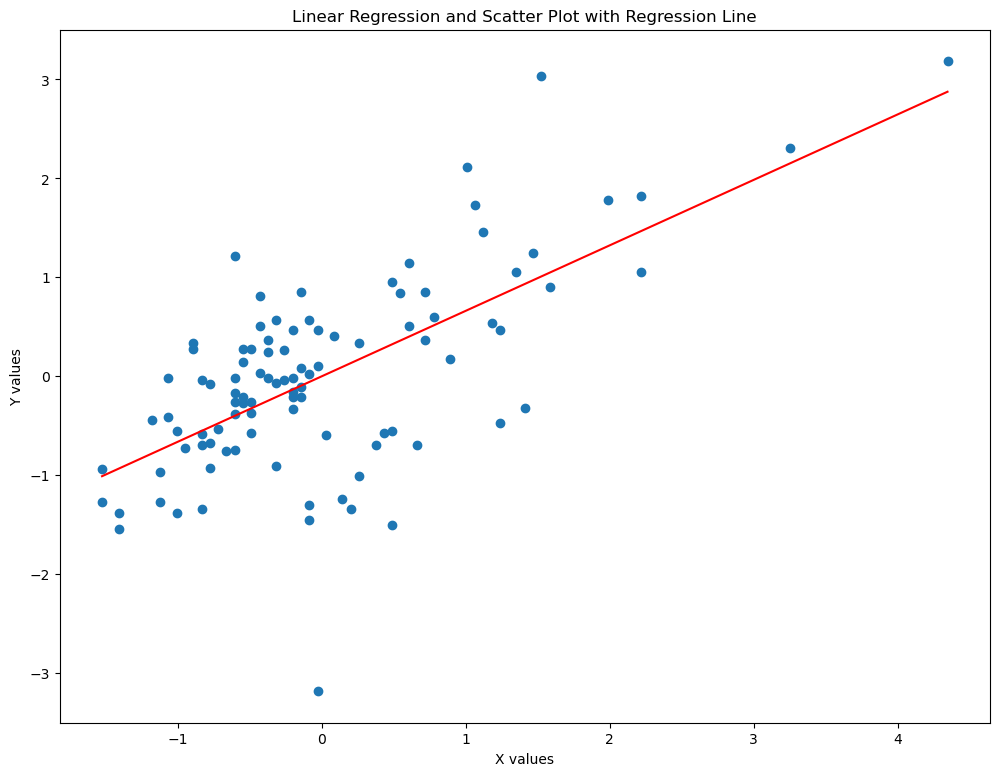

In [15]:
#Making Predictions
Y_pred = m * X + c
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color="red")
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear Regression and Scatter Plot with Regression Line')
plt.show()

In [17]:
# Lists to store cost function values and iterations
cost_history = []

for i in range(epochs):
    Y_pred = m * X + c
    cost = (1/n) * sum((Y - Y_pred)**2)
    cost_history.append(cost)

    D_m = (-2/n) * sum(X * (Y - Y_pred))
    D_c = (-2/n) * sum(Y - Y_pred)
    m = m - L * D_m
    c = c - L * D_c

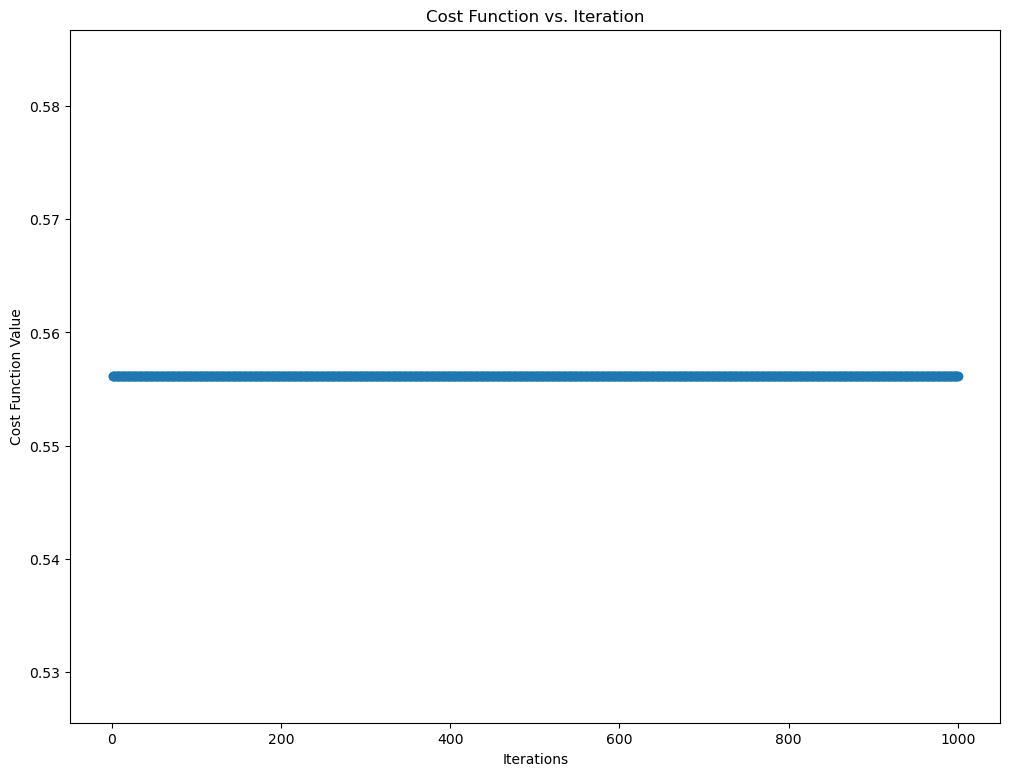

Slope (m): 0.6619554709942285
Intercept (c): -2.4064644777449575e-15


In [19]:
# Plotting cost function versus iteration graph
plt.scatter(range(1, epochs + 1), cost_history, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs. Iteration')
plt.show()

# Printing the final learned parameters
print("Slope (m):", m)
print("Intercept (c):", c)

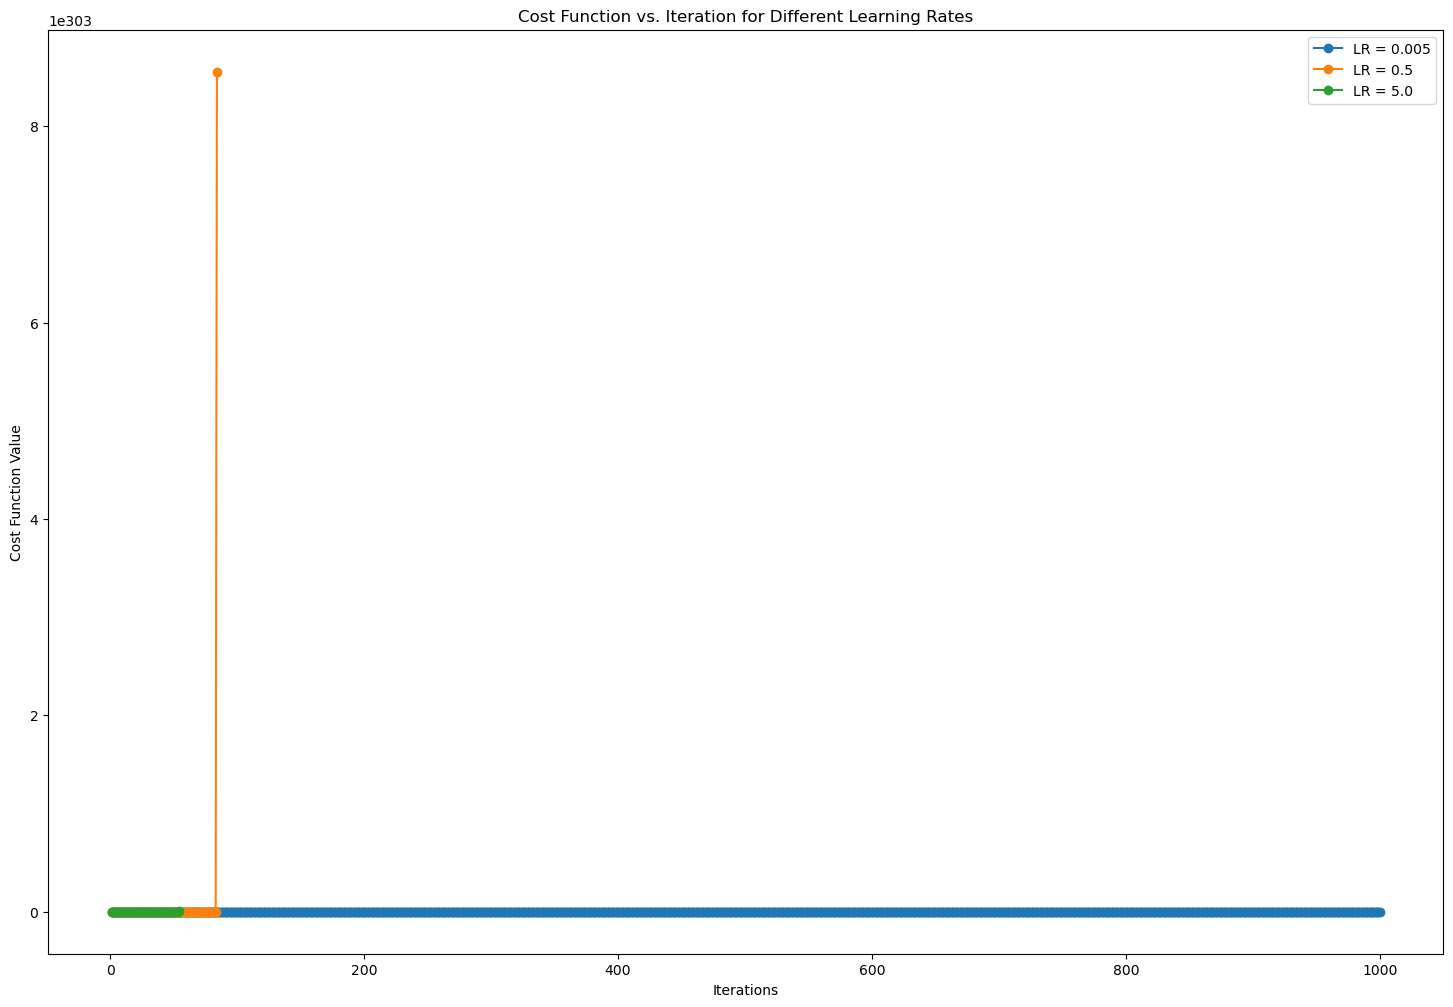

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (18.0, 12.0)

# Preprocessing
x_data = pd.read_csv('linearX.csv')
y_data = pd.read_csv('linearY.csv')
X = x_data.iloc[:, 0]
Y = y_data.iloc[:, 0]

# Learning rates to test
learning_rates = [0.005, 0.5, 5.0]

for lr in learning_rates:
    # Model initialization
    m = 0
    c = 0
    epochs = 1000
    n = float(len(X))

    # Lists to store cost function values and iterations
    cost_history = []

    for i in range(epochs):
        Y_pred = m * X + c
        cost = (1/n) * sum((Y - Y_pred)**2)
        cost_history.append(cost)

        D_m = (-2/n) * sum(X * (Y - Y_pred))
        D_c = (-2/n) * sum(Y - Y_pred)

        m = m - lr * D_m
        c = c - lr * D_c

    # Plotting cost function versus iteration graph for each learning rate
    plt.plot(range(1, epochs + 1), cost_history, label=f'LR = {lr}', marker='o', linestyle='-')

# Display the plots
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs. Iteration for Different Learning Rates')
plt.legend()
plt.show()


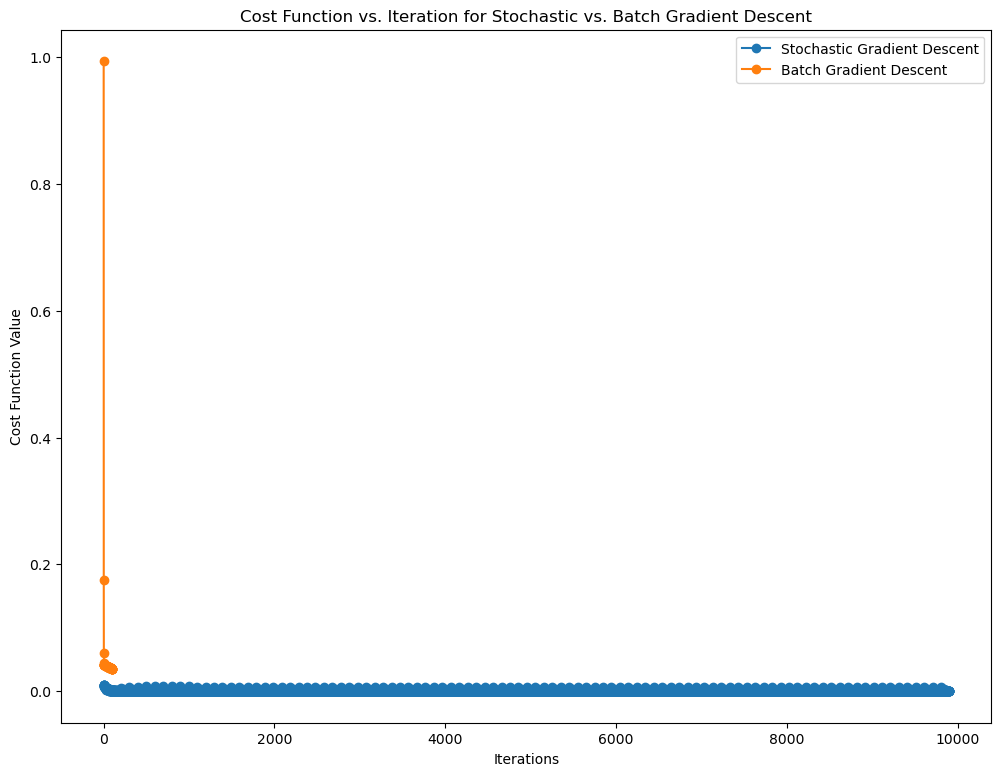

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Load data
x_data = pd.read_csv('linearX.csv')
y_data = pd.read_csv('linearY.csv')
X = x_data.iloc[:, 0]
Y = y_data.iloc[:, 0]

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, Y, learning_rate, epochs):
    m = 0
    c = 0
    n = float(len(X))
    cost_history = []

    for i in range(epochs):
        for j in range(len(X)):
            Y_pred = m * X[j] + c
            cost = (1/n) * (Y[j] - Y_pred)**2
            cost_history.append(cost)

            D_m = (-2/n) * X[j] * (Y[j] - Y_pred)
            D_c = (-2/n) * (Y[j] - Y_pred)

            m = m - learning_rate * D_m
            c = c - learning_rate * D_c

    return cost_history

# Batch Gradient Descent
def batch_gradient_descent(X, Y, learning_rate, epochs):
    m = 0
    c = 0
    n = float(len(X))
    cost_history = []

    for i in range(epochs):
        Y_pred = m * X + c
        cost = (1/n) * sum((Y - Y_pred)**2)
        cost_history.append(cost)

        D_m = (-2/n) * sum(X * (Y - Y_pred))
        D_c = (-2/n) * sum(Y - Y_pred)

        m = m - learning_rate * D_m
        c = c - learning_rate * D_c

    return cost_history

# Choose a suitable learning rate
learning_rate = 0.01

# Set common epochs value
epochs = 100

# Stochastic Gradient Descent
stochastic_cost_history = stochastic_gradient_descent(X, Y, learning_rate, epochs)

# Batch Gradient Descent
batch_cost_history = batch_gradient_descent(X, Y, learning_rate, epochs)

# Plotting cost function versus iteration graph for each method
plt.plot(range(1, len(stochastic_cost_history) + 1), stochastic_cost_history, label='Stochastic Gradient Descent', marker='o', linestyle='-')
plt.plot(range(1, epochs + 1), batch_cost_history, label='Batch Gradient Descent', marker='o', linestyle='-')

plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs. Iteration for Stochastic vs. Batch Gradient Descent')
plt.legend()
plt.show()
